In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!ls

Blood_data_Tema.csv  sample_data


## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('Blood_data_Tema.csv')

In [ ]:
train.head()

,YEAR,MONTH,QTY_DEMANDED,QTY_SUPPLIED
0,2013,January,162.0,136.0
1,2013,February,188.0,202.0
2,2013,March,229.0,225.0
3,2013,April,220.0,204.0
4,2013,May,252.0,251.0


In [ ]:
train['QTY_SUPPLIED'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
88    False
89    False
90    False
91    False
92    False
Name: QTY_SUPPLIED, Length: 93, dtype: bool

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
train.isnull()

,YEAR,MONTH,QTY_DEMANDED,QTY_SUPPLIED
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
88,False,False,False,False
89,False,False,False,False
90,False,False,False,False
91,False,False,False,False


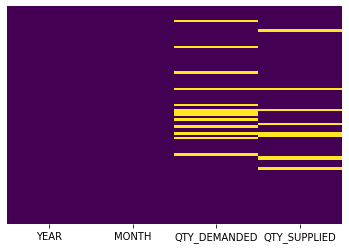

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

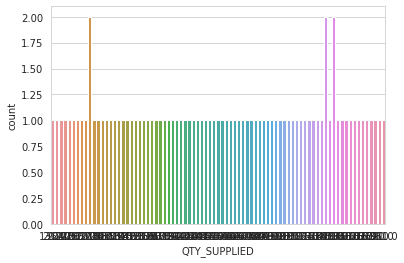

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='QTY_SUPPLIED',data=train)

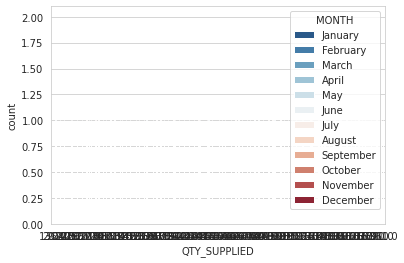

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='QTY_SUPPLIED',hue='MONTH',data=train,palette='RdBu_r')

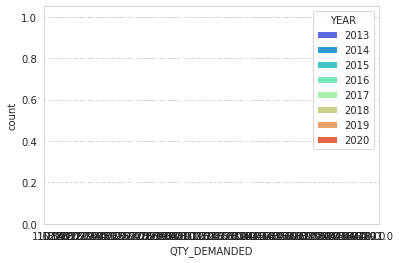

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='QTY_DEMANDED',hue='YEAR',data=train,palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


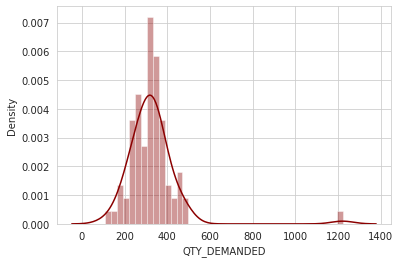

In [ ]:
sns.distplot(train['QTY_DEMANDED'].dropna(),kde=True,color='darkred',bins=40)

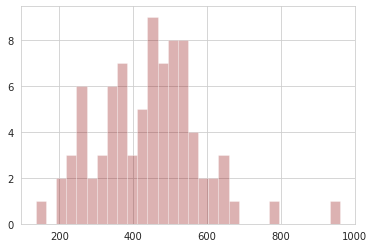

In [ ]:
train['QTY_SUPPLIED'].hist(bins=30,color='darkred',alpha=0.3)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


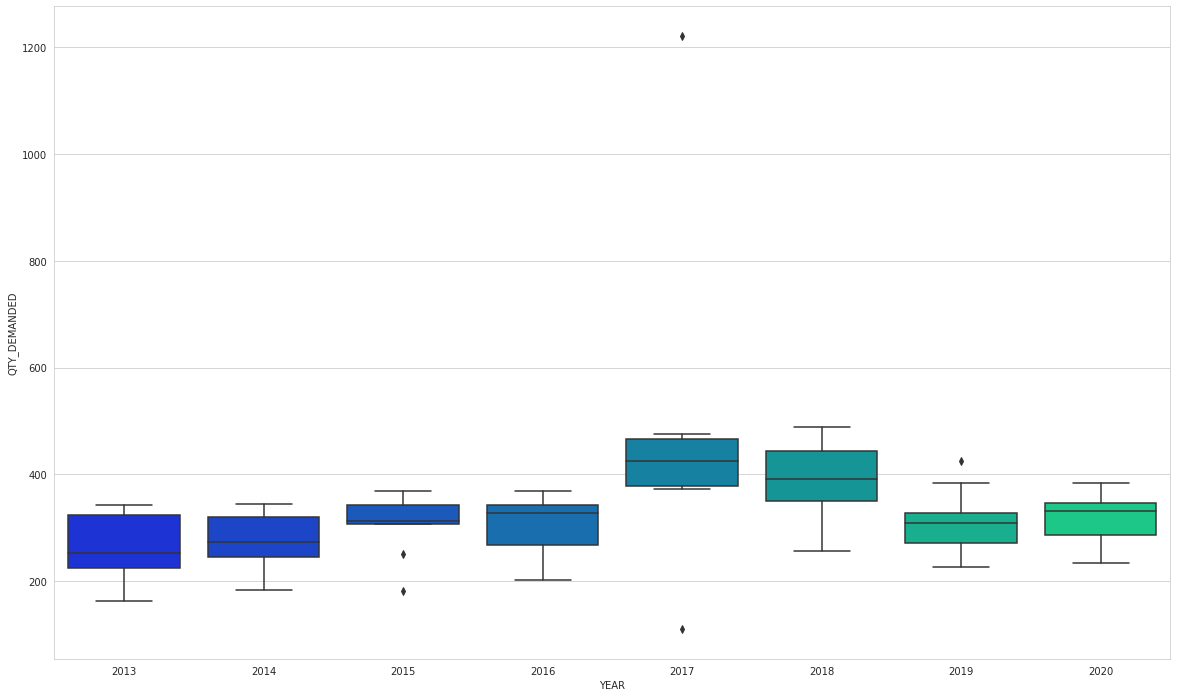

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='YEAR',y='QTY_DEMANDED',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    QTY_DEMANDED = cols[0]
    YEAR = cols[1]
    
    if pd.isnull(QTY_DEMANDED):

        if YEAR == 2013:
            return 240

        elif YEAR == 2014:
            return 260
        
        elif YEAR == 2015:
            return 290
        
        elif YEAR == 2016:
            return 320
        
        elif YEAR == 2017:
            return 420
        
        elif YEAR == 2018:
            return 390
        
        elif YEAR == 2019:
            return 300

        else:
            return 320

    else:
        return QTY_DEMANDED

Now apply that function!

In [ ]:
train['QTY_DEMANDED'] = train[['QTY_DEMANDED','YEAR']].apply(impute_age,axis=1)

Now let's check that heat map again!

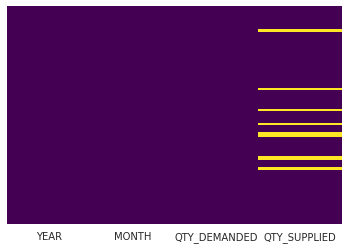

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

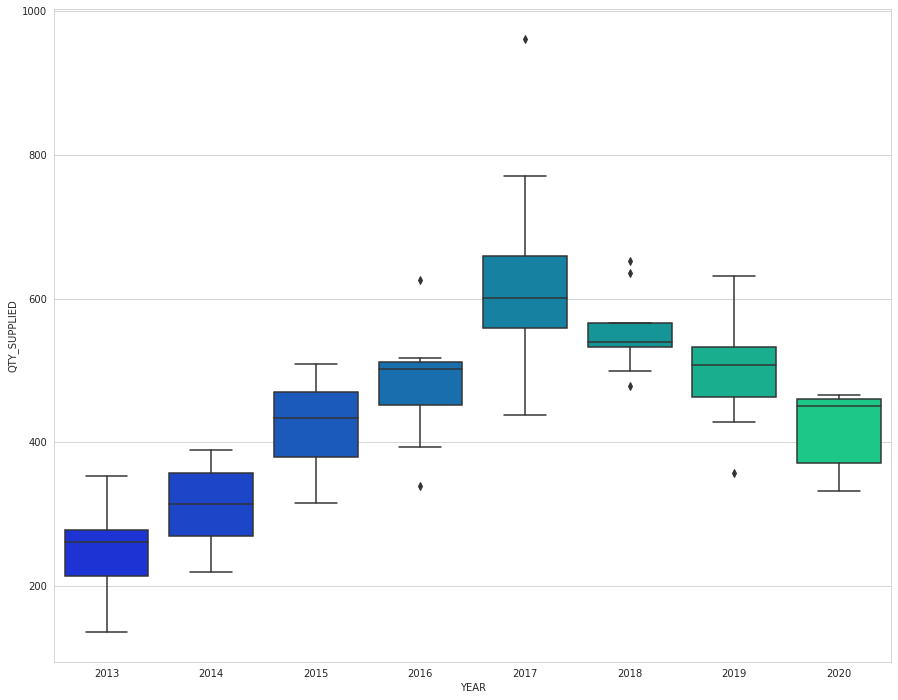

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(x='YEAR',y='QTY_SUPPLIED',data=train,palette='winter')

In [ ]:
def impute_year(cols):
    QTY_SUPPLIED = cols[0]
    YEAR = cols[1]
    
    if pd.isnull(QTY_SUPPLIED):

        if YEAR == 2013:
            return 250

        elif YEAR == 2014:
            return 300
        
        elif YEAR == 2015:
            return 430
        
        elif YEAR == 2016:
            return 490
        
        elif YEAR == 2017:
            return 600
        
        elif YEAR == 2018:
            return 520
        
        elif YEAR == 2019:
            return 500

        else:
            return 450

    else:
        return QTY_SUPPLIED

In [ ]:
train['QTY_SUPPLIED'] = train[['QTY_SUPPLIED','YEAR']].apply(impute_year,axis=1)

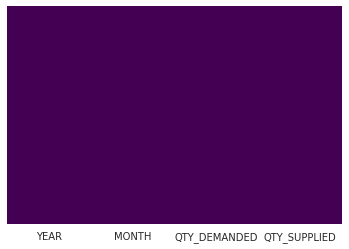

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df = pd.DataFrame(train)

In [ ]:
df.to_csv("datasetaftercleaning.csv")